In [1]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 12.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.1/124.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
#hide
from fastai.vision.all import *
path = Path('/kaggle/input/chest-xray-pneumonia/chest_xray')

# Importando fastAI vision
# Path('/kaggle/input/chest-xray-pneumonia'): abre o banco de dados que eu adicionei (já existente no Kaggle).

In [3]:
Path.BASE_PATH = path

# "Considere a pasta path como a base para mostrar todos os caminhos relativos daqui pra frente."

In [4]:
path.ls()

(#5) [Path('chest_xray'),Path('__MACOSX'),Path('val'),Path('test'),Path('train')]

In [5]:
(path/"train").ls()

(#2) [Path('train/PNEUMONIA'),Path('train/NORMAL')]

In [6]:
xray = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(seed=42),
    item_tfms=Resize(224, method='pad', pad_mode='zeros')
)

dls = xray.dataloaders(path/"train", bs=16)

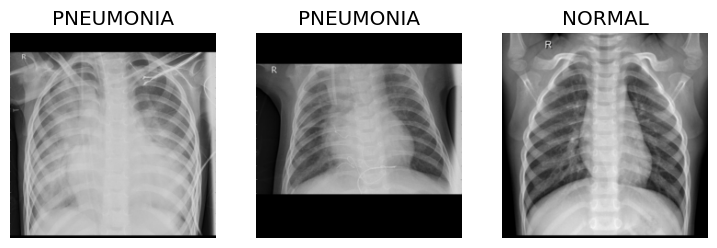

In [7]:
dls.show_batch(nrows=1, ncols=3)

In [8]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

# blocks=(ImageBlock, CategoryBlock),
#Define o tipo de dado de entrada (x) e o tipo de saída (y) que você está trabalhando:
    # ImageBlock: entrada são imagens
    # CategoryBlock: saída (label) é uma categoria — neste caso, "PNEUMONIA" ou "NORMAL"

# get_items=get_image_files,
# Diz ao FastAI como encontrar os arquivos de imagem no diretório que você vai passar mais tarde (com dataloaders(...)).
    # get_image_files procura recursivamente por arquivos com extensão .jpg, .png, etc. Ele retorna uma lista de Path objetos representando os caminhos das imagens.

# get_y=parent_label,
# Define como extrair o rótulo (y) de cada imagem.
    # parent_label significa: “pegue o nome da pasta onde o arquivo está” como sendo o rótulo.


# splitter=RandomSplitter(seed=42),
# Define como dividir os dados em treino e validação.
# RandomSplitter(seed=42) divide os dados aleatoriamente, com 20% para validação (padrão).
# O seed=42 garante que essa divisão seja reprodutível (sempre a mesma se você rodar de novo).

# item_tfms=Resize(224, method='pad', pad_mode='zeros')
# Define as transformações aplicadas a cada item individualmente, antes do batching.
# Resize(224) redimensiona todas as imagens para 224×224.
# method='pad' garante que o redimensionamento não corte a imagem, mas sim preencha com bordas pretas quando necessário. Isso é essencial para manter a integridade da imagem de raio-X, evitando perda de regiões importantes.

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 169MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,0.323188,0.158597,0.063279,01:12


epoch,train_loss,valid_loss,error_rate,time
0,0.160195,0.049811,0.018217,01:13
1,0.076523,0.041559,0.013423,01:09


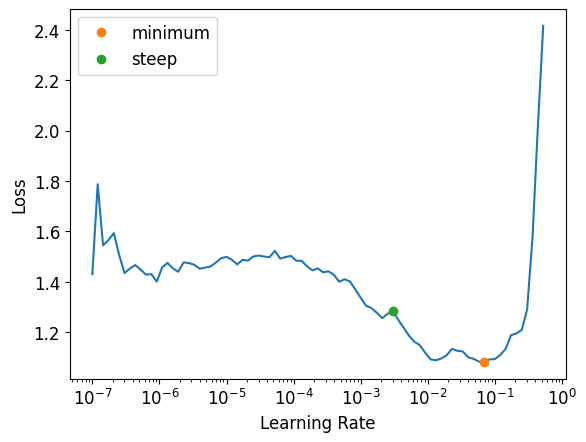

In [9]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

# lr_min, lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))
# Roda um mini-treino de poucos batches, testando vários learning rates diferentes, que vão crescendo de forma exponencial (de bem pequeno até grande),
# E mede a loss para cada learning rate,
# No final, plota um gráfico: Learning Rate vs Loss
# minimum: O learning rate onde a loss foi mínima durante o teste
# steep (recomendado): O learning rate onde a curva da loss teve a descida mais íngreme (ou seja, onde o gradiente da perda foi mais negativo)

In [10]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

# Mostrando os LRs

Minimum/10: 6.92e-03, steepest point: 3.02e-03


In [14]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(2, 3e-3)

# O que é o One Cycle Policy?
# É uma estratégia de ajuste de learning rate durante o treino:

#Ele faz o learning rate:

# Subir gradualmente nas primeiras etapas (warm-up),

# Depois cair lentamente,

# Eventualmente chegando a valores muito pequenos no final do ciclo.

# Por que?
# Melhora a convergência: Ajuda a sair de mínimos locais
# Evita overfitting: Ao reduzir o LR no final, faz o modelo "assentar"
# Reduz tempo de treino	Muitas vezes atinge bom desempenho em menos épocas

# Nesse codigo ele treina apenas as cabeças (partes novas) do modelo, com o restante (pré-treinado) congelado.

epoch,train_loss,valid_loss,error_rate,time
0,0.201374,0.107203,0.035475,01:05
1,0.091736,0.051048,0.018217,01:05


In [15]:
learn.unfreeze()

# Antes: Apenas as últimas camadas (fully connected layers / head) estavam treináveis. Backbone (camadas convolucionais) estava congelado
# Agora: Todas as camadas da ResNet34 (incluindo as convolucionais pré-treinadas) ficam treináveis. Backbone agora pode ser ajustado (fine-tuning completo)

SuggestedLRs(valley=1.4454397387453355e-05)

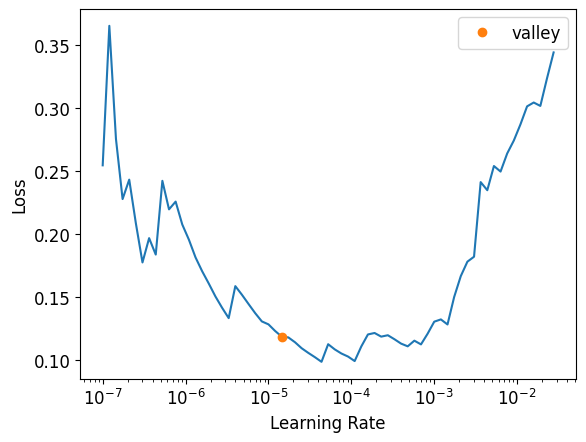

In [16]:
learn.lr_find()

# Roda o lr.finda pra saber qual learning rate ideal nas camadas mais profundas.

# O "valley" (ou vale) é o ponto onde a perda (Loss) atinge o valor mais baixo antes de começar a subir de novo. É um ponto ideal entre ter a LR muito baixa (tempo longo de treinamento, overfitting) e perde muito a loss.
# A curva era ao contrário do modelo com pesos "virgens" (mais "burro"). Nesse caso, o modelo ja As camadas já estão com pesos bem razoáveis, sabe bastante coisa util, mesmo antes do fine tuning.
# Como a rede já está "boa", a loss começa baixa (porque os pesos já estão bem ajustados para visão em geral).
# Mas à medida que o learning rate aumenta, você começa a estragar os pesos (por updates muito agressivos),

In [17]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(2, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(3, lr_max=slice(1e-6,1e-4))

# learn = vision_learner(dls, resnet34, metrics=error_rate): Criou o learner
# learn.fit_one_cycle(2, 3e-3): Só a cabeça (últimas camadas) foi treinada primeiro com LR ideal.
# learn.unfreeze(): Liberou todas as camadas para treino (inclusive as convolucionais pré-treinadas)
# it_one_cycle(3, lr_max=slice(1e-6,1e-4)): Fez fine-tuning completo com learning rates diferentes (baseado no LR ideal): Camadas iniciais com LR menor (1e-6), camadas finais com LR maior (1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.219320,0.112193,0.033557,01:10
1,0.100539,0.041310,0.015340,01:09


epoch,train_loss,valid_loss,error_rate,time
0,0.087928,0.034985,0.013423,01:12
1,0.071651,0.031257,0.011505,01:12
2,0.062704,0.030921,0.011505,01:12


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

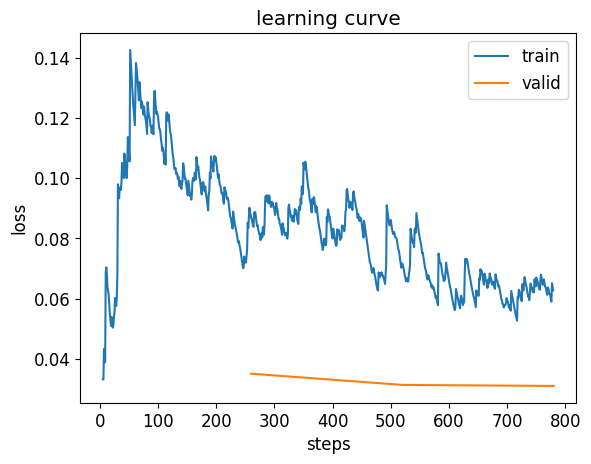

In [18]:
learn.recorder.plot_loss()

# Gráfico de loss ao longo das épocas de treinamento. 
# Se a loss de treino cai mas a de validação piora, pode ser overfitting.
# Se a loss de treino está muito alta e não cai, pode ser LR errado ou problema nos dados